In [62]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
set.seed(9999)

In [63]:
df_default <- read_excel('data/default-cc-data.xls')  %>%
    select(-c(X2:X11))%>%
    rename(client_id = "...1", 
           limit_bal = X1,
           sep_bill = X12 , 
           aug_bill= X13 ,
           july_bill= X14,
           june_bill= X15,
           may_bill= X16, 
           april_bill=X17,
           sep_paid= X18 ,
           aug_paid= X19, 
           july_paid= X20, 
           june_paid= X21 ,
           may_paid= X22 ,
           april_paid= X23,
           default_status = Y)%>%
    slice(2:30001) %>%
    mutate_if(is.character, as.numeric) %>%
    mutate(client_id = as.character(client_id),
          default_status = case_when(default_status =="1"~"yes",
                                     default_status== "0"~"no"),
          default_status = as.factor(default_status),
           apr_debt_ratio = april_bill/limit_bal,
           may_debt_ratio = may_bill/limit_bal,
           jun_debt_ratio = june_bill/limit_bal,
           jul_debt_ratio = july_bill/limit_bal,
           aug_debt_ratio = aug_bill/limit_bal,
           sep_debt_ratio = sep_bill/limit_bal) 

head(df_default)

New names:
* `` -> ...1



client_id,limit_bal,sep_bill,aug_bill,july_bill,june_bill,may_bill,april_bill,sep_paid,aug_paid,⋯,june_paid,may_paid,april_paid,default_status,apr_debt_ratio,may_debt_ratio,jun_debt_ratio,jul_debt_ratio,aug_debt_ratio,sep_debt_ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,3913,3102,689,0,0,0,0,689,⋯,0,0,0,yes,0.0000000,0.00000000,0.00000000,0.0344500,0.1551000,0.1956500
2,120000,2682,1725,2682,3272,3455,3261,0,1000,⋯,1000,0,2000,yes,0.0271750,0.02879167,0.02726667,0.0223500,0.0143750,0.0223500
3,90000,29239,14027,13559,14331,14948,15549,1518,1500,⋯,1000,1000,5000,no,0.1727667,0.16608889,0.15923333,0.1506556,0.1558556,0.3248778
4,50000,46990,48233,49291,28314,28959,29547,2000,2019,⋯,1100,1069,1000,no,0.5909400,0.57918000,0.56628000,0.9858200,0.9646600,0.9398000
5,50000,8617,5670,35835,20940,19146,19131,2000,36681,⋯,9000,689,679,no,0.3826200,0.38292000,0.41880000,0.7167000,0.1134000,0.1723400
6,50000,64400,57069,57608,19394,19619,20024,2500,1815,⋯,1000,1000,800,no,0.4004800,0.39238000,0.38788000,1.1521600,1.1413800,1.2880000


In [64]:
default_mutated <- df_default %>% 
    mutate(apr_paid_ratio = april_paid/limit_bal,
           may_paid_ratio = may_paid/limit_bal,
           jun_paid_ratio = june_paid/limit_bal,
           jul_paid_ratio = july_paid/limit_bal,
           aug_paid_ratio = aug_paid/limit_bal,
           sep_paid_ratio = sep_paid/limit_bal) %>% 
    select(client_id, limit_bal, default_status:sep_paid_ratio)
head(default_mutated)

client_id,limit_bal,default_status,apr_debt_ratio,may_debt_ratio,jun_debt_ratio,jul_debt_ratio,aug_debt_ratio,sep_debt_ratio,apr_paid_ratio,may_paid_ratio,jun_paid_ratio,jul_paid_ratio,aug_paid_ratio,sep_paid_ratio
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,yes,0.0000000,0.00000000,0.00000000,0.0344500,0.1551000,0.1956500,0.00000000,0.00000000,0.000000000,0.000000000,0.034450000,0.00000000
2,120000,yes,0.0271750,0.02879167,0.02726667,0.0223500,0.0143750,0.0223500,0.01666667,0.00000000,0.008333333,0.008333333,0.008333333,0.00000000
3,90000,no,0.1727667,0.16608889,0.15923333,0.1506556,0.1558556,0.3248778,0.05555556,0.01111111,0.011111111,0.011111111,0.016666667,0.01686667
4,50000,no,0.5909400,0.57918000,0.56628000,0.9858200,0.9646600,0.9398000,0.02000000,0.02138000,0.022000000,0.024000000,0.040380000,0.04000000
5,50000,no,0.3826200,0.38292000,0.41880000,0.7167000,0.1134000,0.1723400,0.01358000,0.01378000,0.180000000,0.200000000,0.733620000,0.04000000
6,50000,no,0.4004800,0.39238000,0.38788000,1.1521600,1.1413800,1.2880000,0.01600000,0.02000000,0.020000000,0.013140000,0.036300000,0.05000000


In [65]:
ratio_averages = default_mutated %>%
    group_by(default_status) %>%
    summarize(apr_debt_avg = mean(apr_debt_ratio),
              may_debt_avg = mean(may_debt_ratio),
              may_debt_avg = mean(may_debt_ratio),
              jun_debt_avg = mean(jun_debt_ratio),
              jul_debt_avg = mean(jul_debt_ratio),
              aug_debt_avg = mean(aug_debt_ratio),
              sep_debt_avg = mean(sep_debt_ratio),
              apr_paid_avg = mean(apr_paid_ratio),
              may_paid_avg = mean(may_paid_ratio),
              may_paid_avg = mean(may_paid_ratio),
              jun_paid_avg = mean(jun_paid_ratio),
              jul_paid_avg = mean(jul_paid_ratio),
              aug_paid_avg = mean(aug_paid_ratio),
              sep_paid_avg = mean(sep_paid_ratio)) %>% 
    pivot_longer(cols = apr_debt_avg:sep_debt_avg,
                 names_to = "month",
                 values_to = "debt_ratio") %>% 
    pivot_longer(cols = apr_paid_avg:sep_paid_avg,
                 names_to = "other_month",
                 values_to = "paid_ratio")
head(ratio_averages)

`summarise()` ungrouping output (override with `.groups` argument)



default_status,month,debt_ratio,other_month,paid_ratio
<fct>,<chr>,<dbl>,<chr>,<dbl>
no,apr_debt_avg,0.2958815,apr_paid_avg,0.03607204
no,apr_debt_avg,0.2958815,may_paid_avg,0.03529407
no,apr_debt_avg,0.2958815,jun_paid_avg,0.03646106
no,apr_debt_avg,0.2958815,jul_paid_avg,0.03911946
no,apr_debt_avg,0.2958815,aug_paid_avg,0.04666987
no,apr_debt_avg,0.2958815,sep_paid_avg,0.04636964


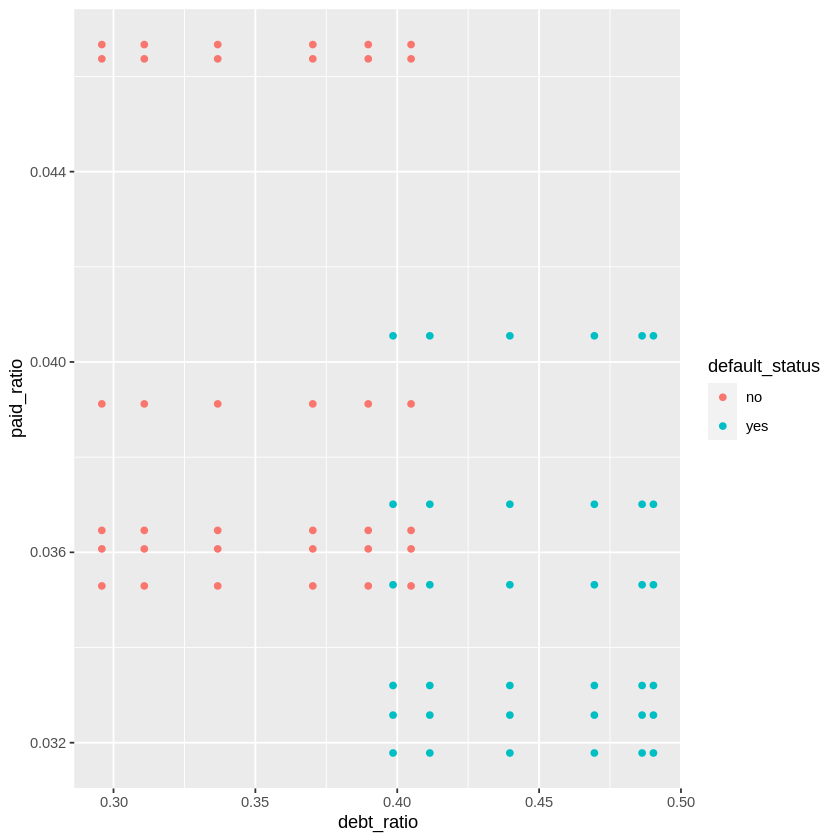

In [66]:
default_scatter <- ggplot(ratio_averages, aes(x = debt_ratio, y = paid_ratio, colour = default_status)) +
geom_point()

default_scatter

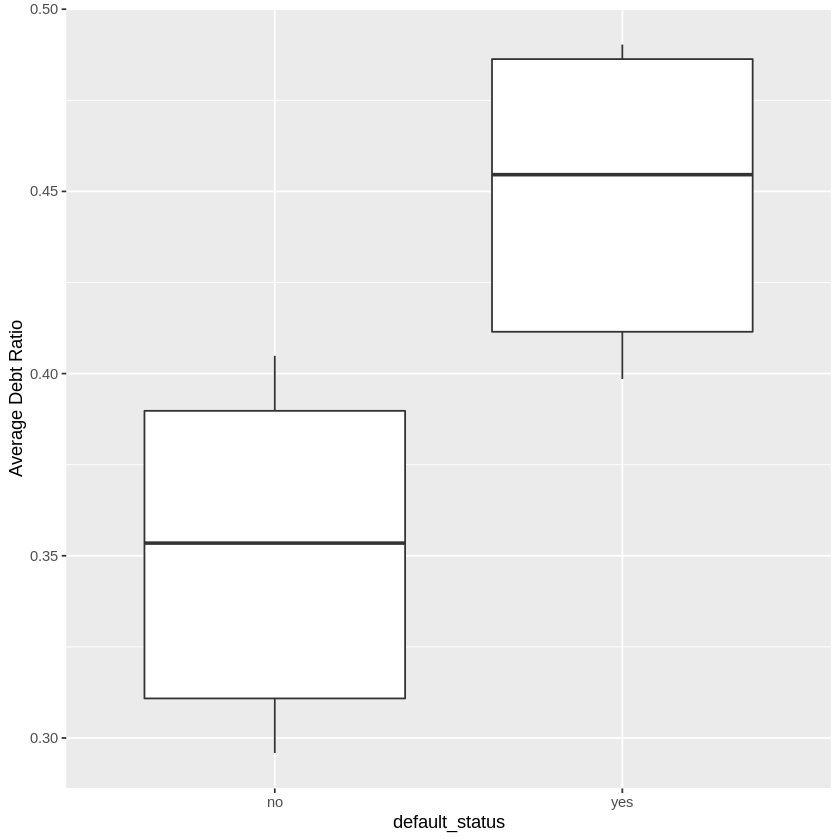

In [73]:
debt_boxplot <- ratio_averages %>% 
    ggplot(aes(y = debt_ratio, x= default_status)) +
    geom_boxplot()+
    labs(y = "Average Debt Ratio", fill = "Default Status")
debt_boxplot

In [69]:
default_pivot <- df_default %>% 
select(client_id, limit_bal, default_status, apr_debt_ratio:sep_debt_ratio) %>% 
 pivot_longer(cols = apr_debt_ratio:sep_debt_ratio,
                 names_to = "month",
                 values_to = "debt_ratio")
head(default_pivot)

client_id,limit_bal,default_status,month,debt_ratio
<chr>,<dbl>,<fct>,<chr>,<dbl>
1,20000,yes,apr_debt_ratio,0.00000
1,20000,yes,may_debt_ratio,0.00000
1,20000,yes,jun_debt_ratio,0.00000
1,20000,yes,jul_debt_ratio,0.03445
1,20000,yes,aug_debt_ratio,0.15510
1,20000,yes,sep_debt_ratio,0.19565


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



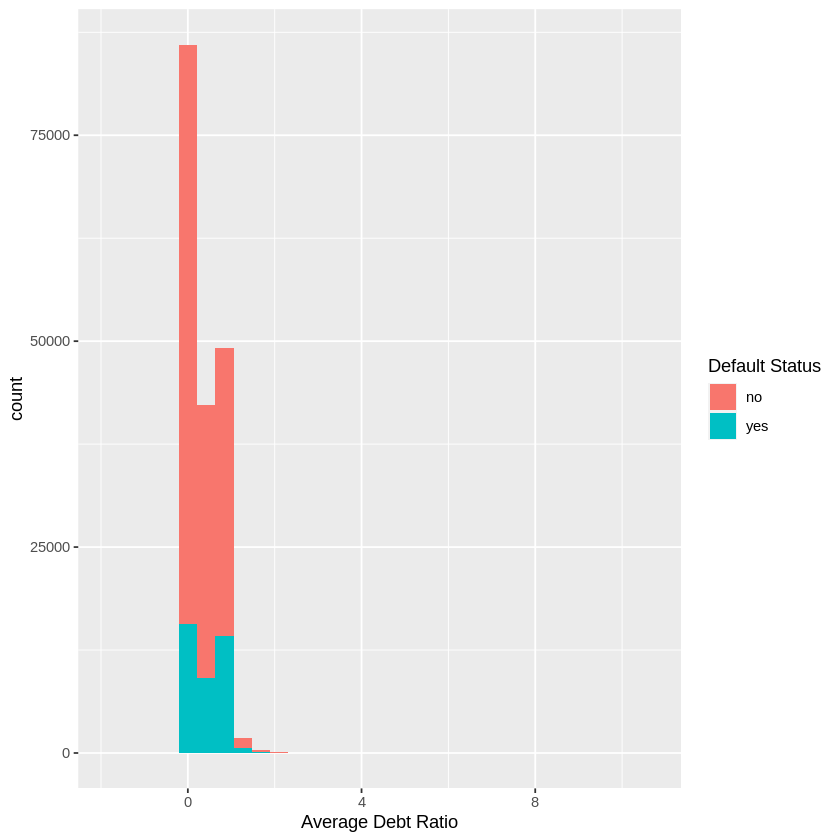

In [70]:
debt_ratio_plot = default_pivot %>%
    ggplot(aes(x = debt_ratio, fill=default_status)) +
    geom_histogram() +
    labs(x = "Average Debt Ratio", fill = "Default Status")
debt_ratio_plot

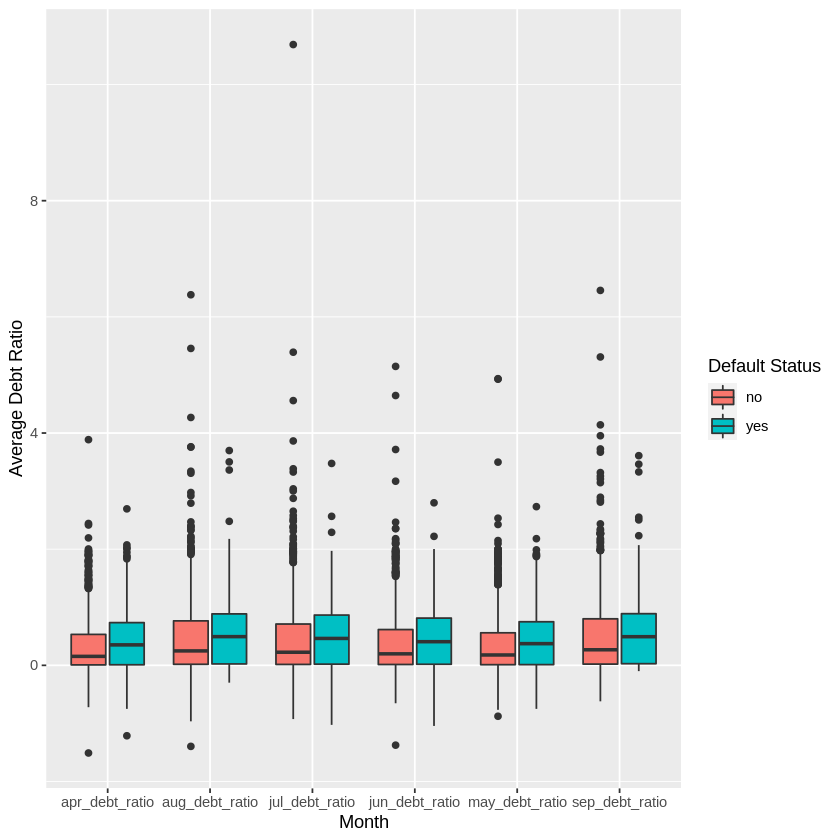

In [75]:
debt_boxplot <- default_pivot %>% 
    ggplot(aes(y = debt_ratio, x = month, fill = default_status)) +
    geom_boxplot()+
    labs(y = "Average Debt Ratio", x = "Month", fill = "Default Status")
debt_boxplot

In [77]:
num_obs <- nrow(df_default)
df_default %>%
  group_by(default_status) %>%
  summarize(n = n(),
    percentage = n() / num_obs * 100)

`summarise()` ungrouping output (override with `.groups` argument)



default_status,n,percentage
<fct>,<int>,<dbl>
no,23364,77.88
yes,6636,22.12
